2602160750 - Bryan Orville Audric

#Importing Library

In [210]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


#Loading Dataset

In [211]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/penguins.csv')

In [212]:
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


#Data Visualization

##Checking data type and shape

In [213]:
data.shape

(344, 5)

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [215]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


##Null value is dropped before visualizing the data

In [216]:
data.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [217]:
data.dropna(inplace=True)

In [218]:
data.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [219]:
data.shape

(335, 5)

Dropping unrelated value in sex column

In [220]:
print(len(data[data.sex=='.']))

1


In [221]:
male = data[data.sex=='MALE'].copy()
female = data[data.sex=='FEMALE'].copy()

data = pd.concat([male, female], ignore_index=True)

In [222]:
print(len(data[data.sex=='.']))

0


##Culmen Length vs Culmen Depth

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

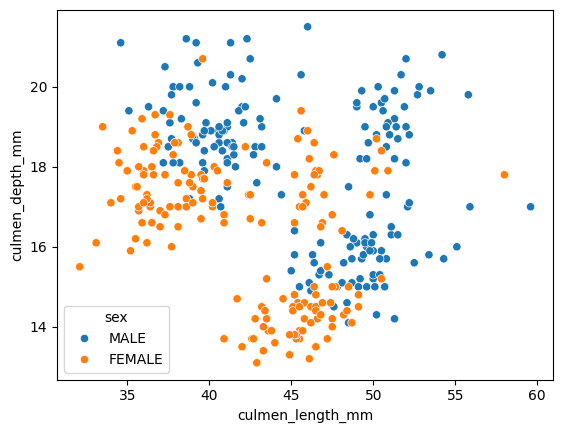

In [223]:
sns.scatterplot(data=data,x='culmen_length_mm',y='culmen_depth_mm',hue ='sex')

##Culmen length

<Axes: xlabel='culmen_length_mm', ylabel='Count'>

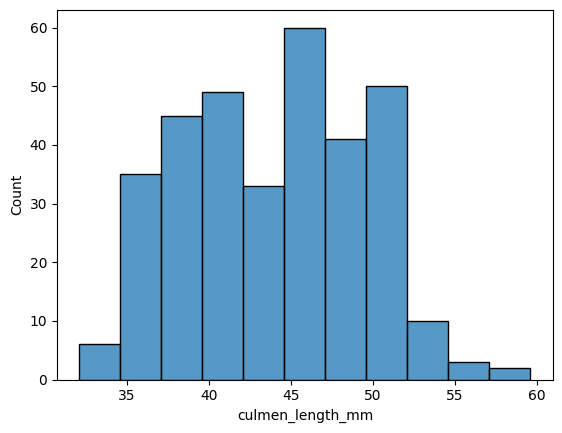

In [224]:
sns.histplot(data=data['culmen_length_mm'])

<Axes: ylabel='culmen_length_mm'>

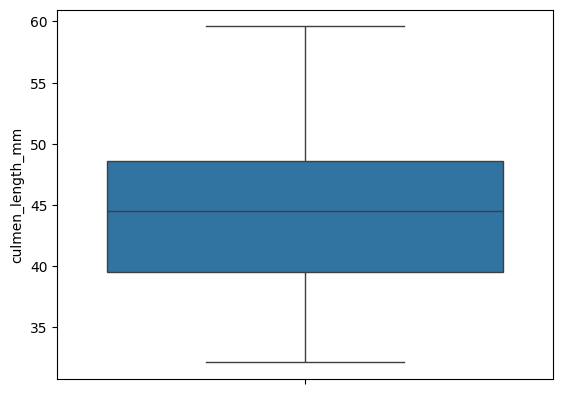

In [225]:
sns.boxplot(data=data['culmen_length_mm'])

## Culmen depth

<Axes: xlabel='culmen_depth_mm', ylabel='Count'>

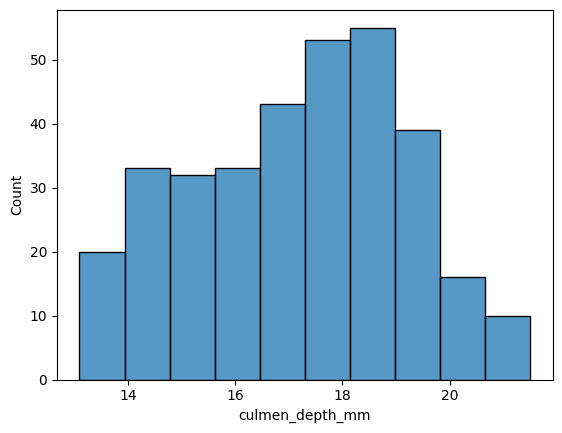

In [226]:
sns.histplot(data=data['culmen_depth_mm'])

<Axes: ylabel='culmen_depth_mm'>

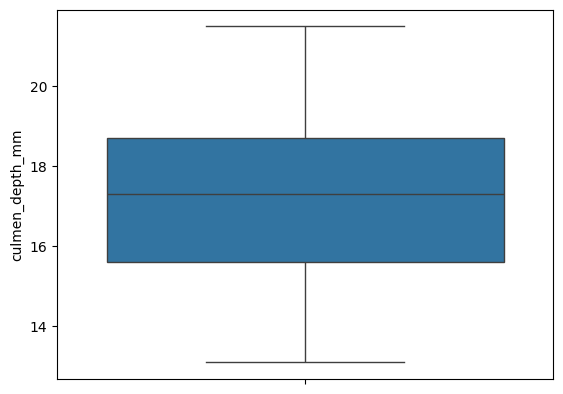

In [227]:
sns.boxplot(data=data['culmen_depth_mm'])

##Flipper length

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

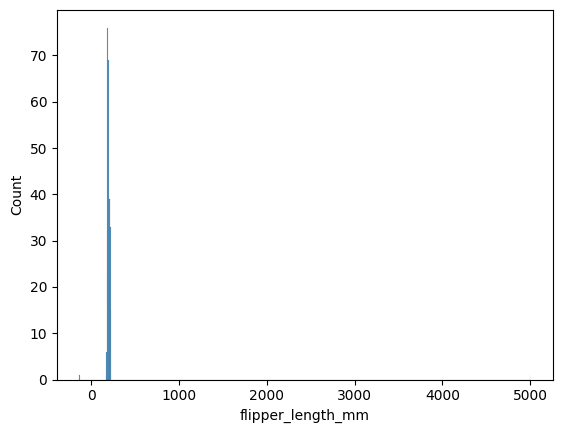

In [228]:
sns.histplot(data=data['flipper_length_mm'])

<Axes: ylabel='flipper_length_mm'>

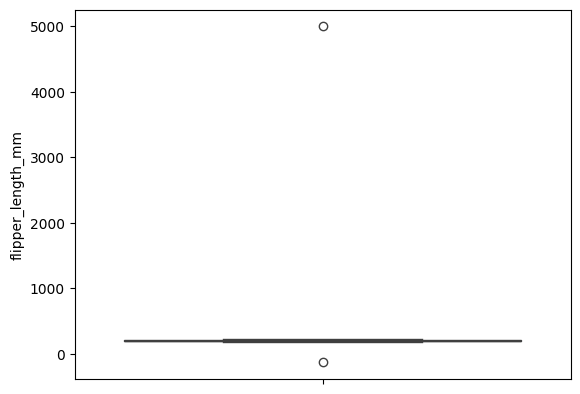

In [229]:
sns.boxplot(data=data['flipper_length_mm'])

##Body mass

<Axes: xlabel='body_mass_g', ylabel='Count'>

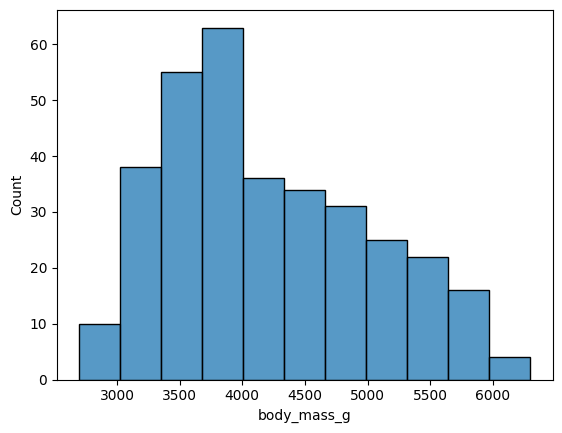

In [230]:
sns.histplot(data=data['body_mass_g'])

<Axes: ylabel='body_mass_g'>

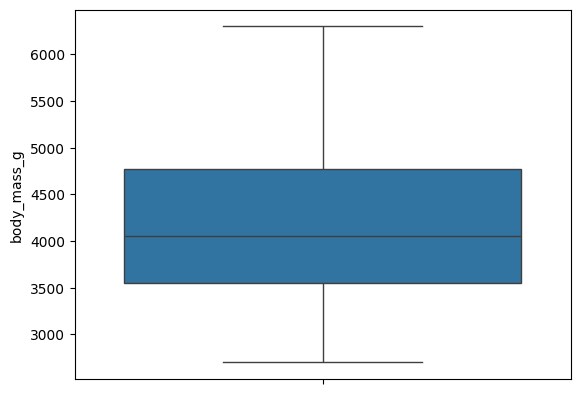

In [231]:
sns.boxplot(data=data['body_mass_g'])

##Sex

<Axes: xlabel='count', ylabel='sex'>

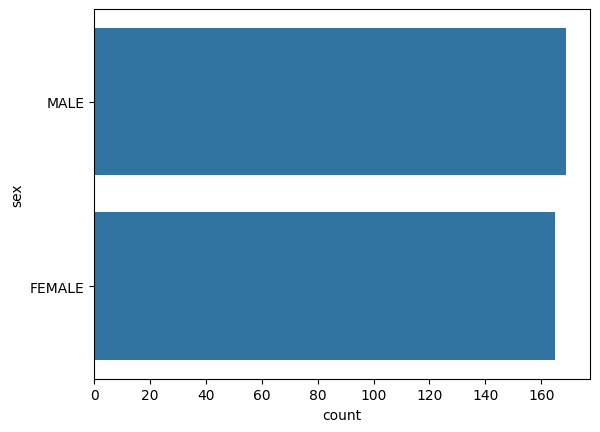

In [232]:
sns.countplot(data=data['sex'])

#Preprocessing

##Removing Outlier

In [233]:
data.shape

(334, 5)

In [234]:
Q1 = data['flipper_length_mm'].quantile(0.25)
Q3 = data['flipper_length_mm'].quantile(0.75)

IQR = Q3 - Q1
Lower = Q1 - 1.5*IQR
Upper = Q3 + 1.5*IQR

Lower_array = np.where(data['flipper_length_mm']<=Lower)[0]
Upper_array = np.where(data['flipper_length_mm']>=Upper)[0]

print(Lower_array)
data.drop(index=Lower_array,inplace=True)
data = data.reset_index(drop=True)
data.drop(index=Upper_array,inplace=True)

data = data.reset_index(drop=True)

[5]


<Axes: ylabel='flipper_length_mm'>

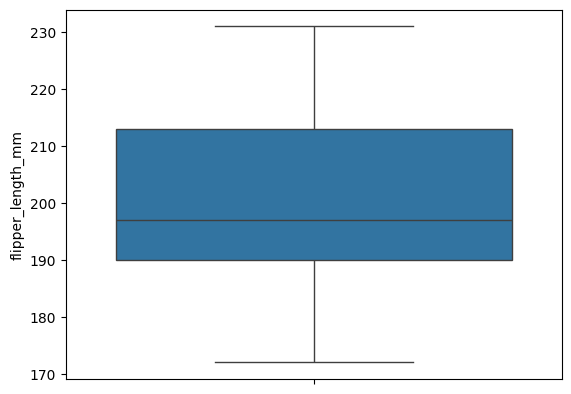

In [235]:
sns.boxplot(data=data['flipper_length_mm'])

In [236]:
data.shape

(332, 5)

##Label encoding sex

In [237]:
encoder = LabelEncoder()
data['sex'] = encoder.fit_transform(data['sex'])

In [238]:
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.3,20.6,190.0,3650.0,1
2,39.2,19.6,195.0,4675.0,1
3,38.6,21.2,191.0,3800.0,1
4,42.5,20.7,197.0,4500.0,1


##Standard Scaler

In [239]:
columns = list(data.columns)
Scaler = StandardScaler()
data = Scaler.fit_transform(data)
data = pd.DataFrame(data,columns=columns)

In [240]:
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.903906,0.790360,-1.425342,-0.566948,0.993994
1,-0.867170,1.761074,-0.783164,-0.691149,0.993994
2,-0.885538,1.250172,-0.426399,0.581912,0.993994
3,-0.995746,2.067616,-0.711811,-0.504847,0.993994
4,-0.279393,1.812165,-0.283693,0.364560,0.993994


In [241]:
data.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

##PCA

In [242]:
pca = PCA(n_components=None)
dfx_pca = pca.fit(data)
dfx_pca.explained_variance_ratio_
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
print(n_components)

2


In [251]:
pca = PCA(n_components=2)
penguins_PCA = pca.fit_transform(data)
print(n_components)

2


In [252]:
penguins_PCA.shape

(332, 2)

<Axes: >

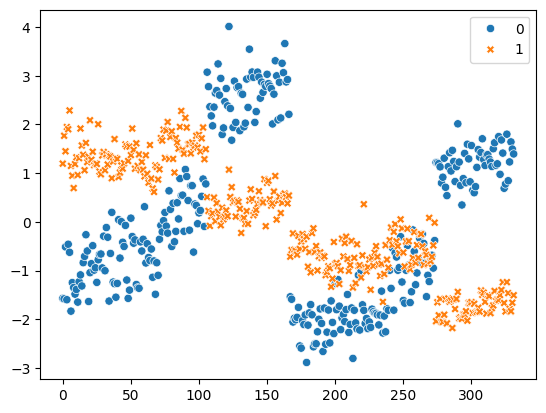

In [253]:
sns.scatterplot(data=penguins_PCA)

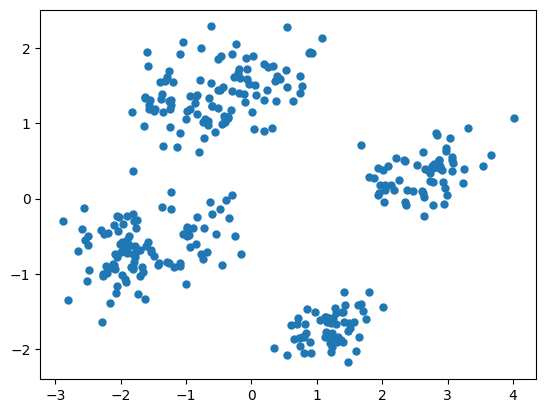

In [254]:
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], s=25)

#K-means clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

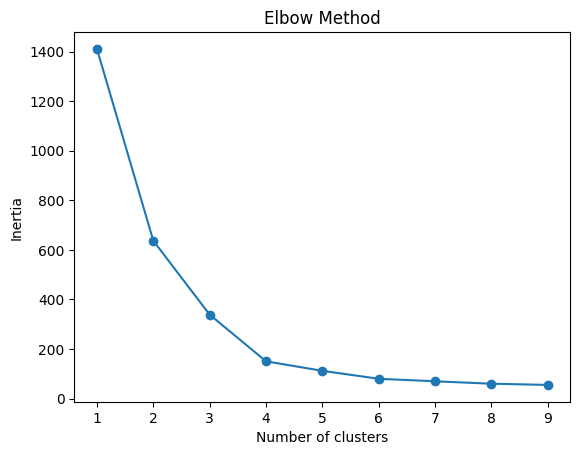

In [246]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()
n_clusters = 4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


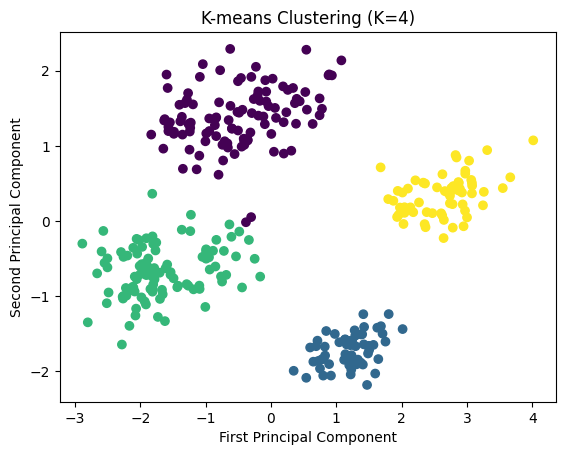

In [247]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={n_clusters})")
plt.show()

#K-means clustering with silhouette_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.5306152382845915
For n_clusters = 3 The average silhouette_score is : 0.5700688888234272
For n_clusters = 4 The average silhouette_score is : 0.6551502355737144


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.5997904174806168
For n_clusters = 6 The average silhouette_score is : 0.585211924184308


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


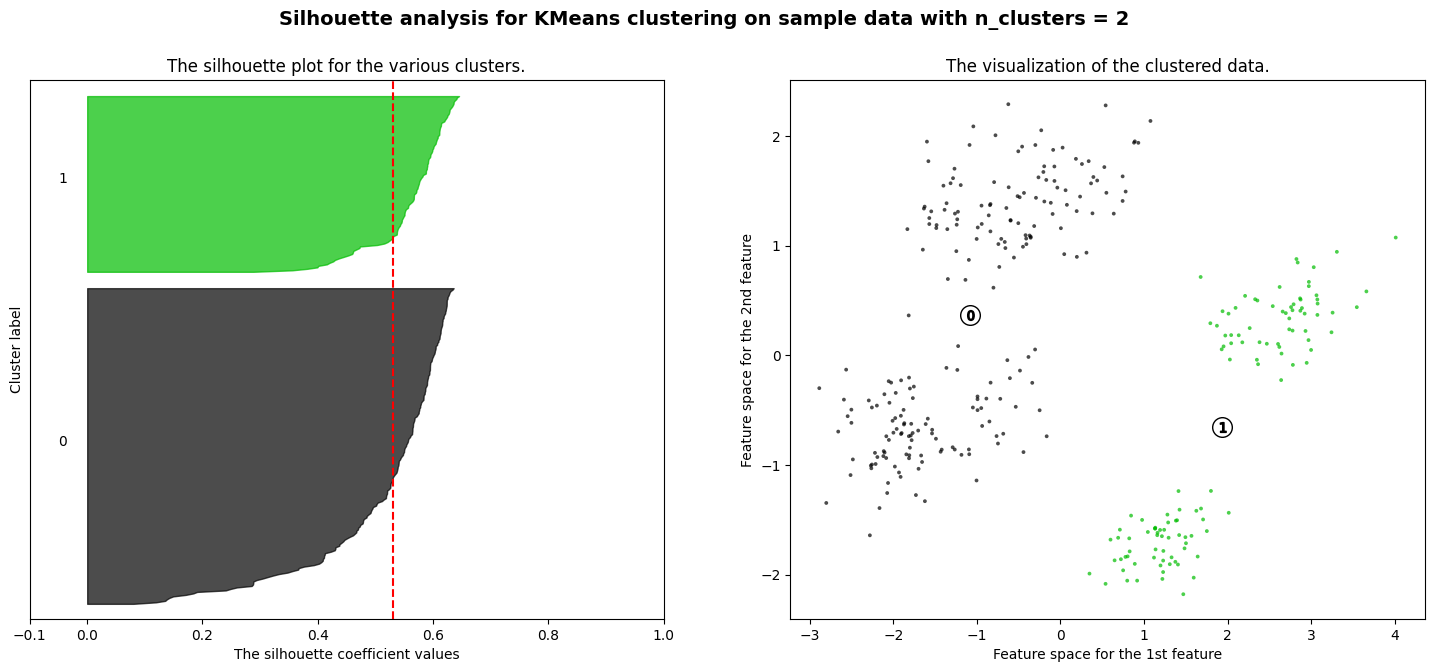

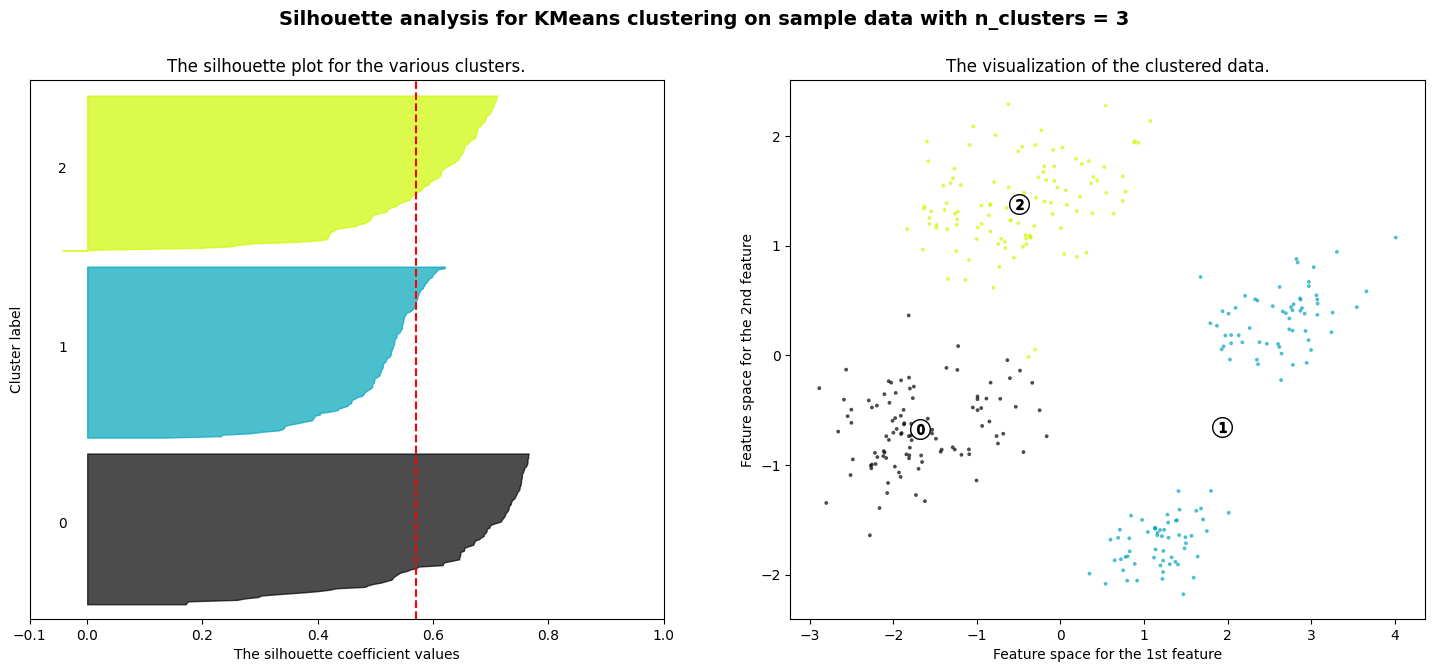

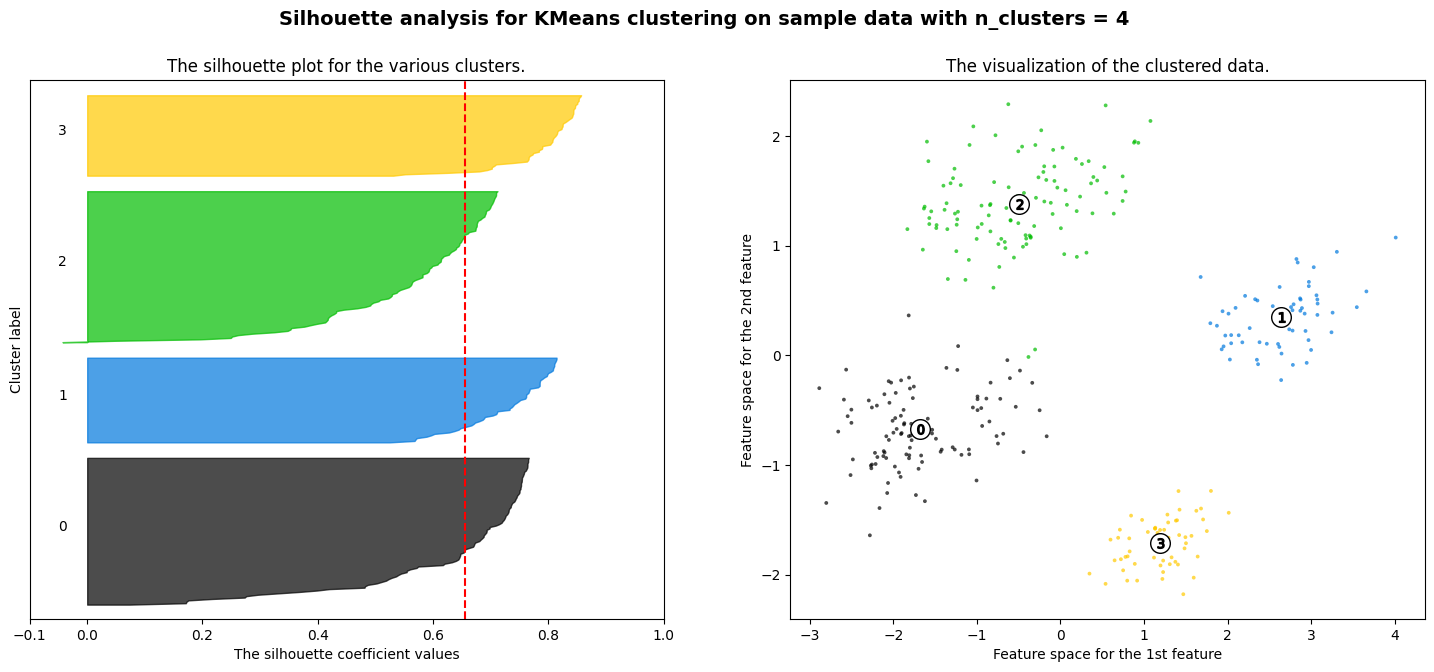

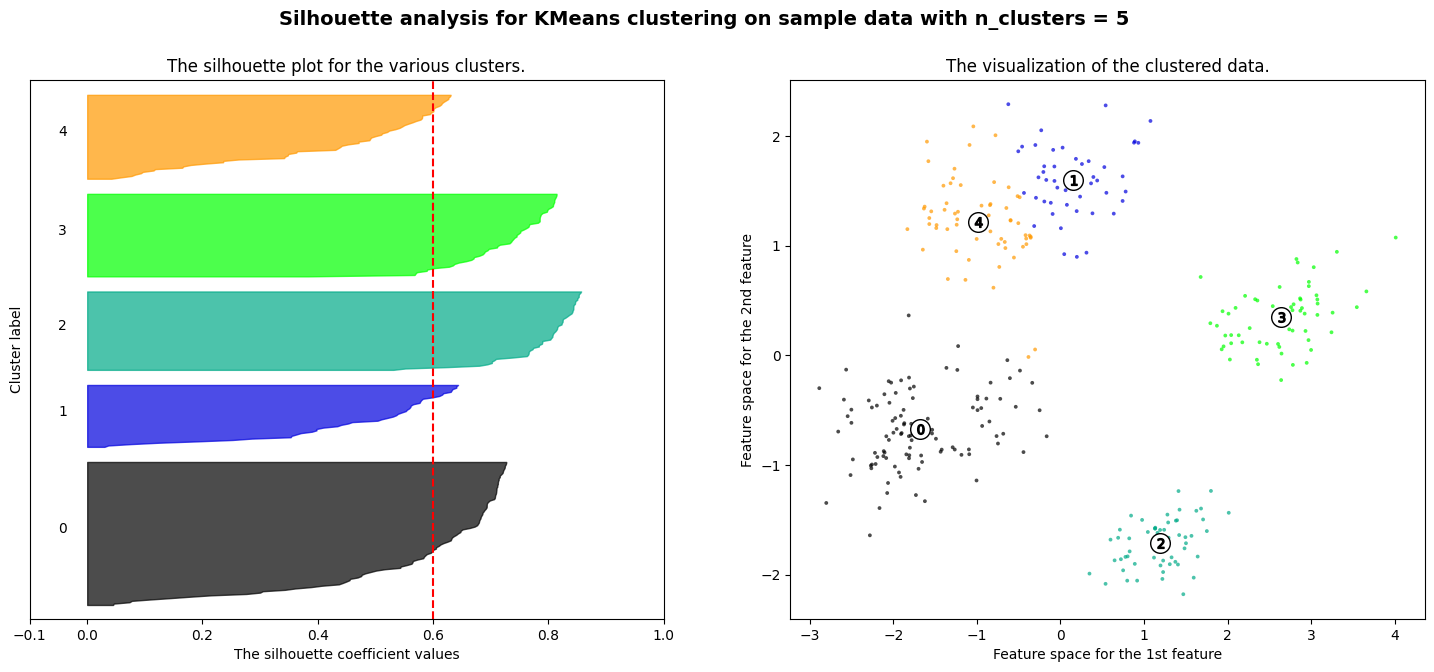

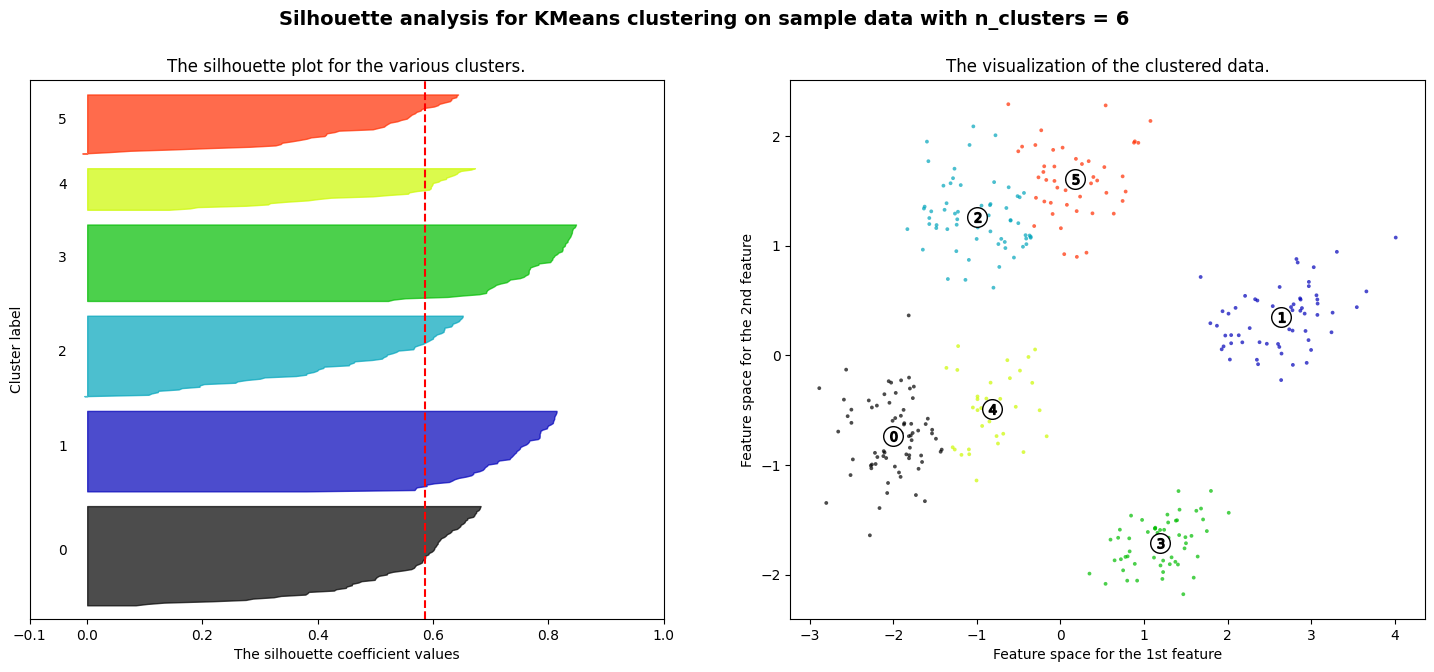

In [248]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(penguins_PCA) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(penguins_PCA)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(penguins_PCA, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(penguins_PCA, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#Insights

Looking at the average silhouette score, the best cluster number is 4 with the highest average silhouette score of 0.6551502355737144. If we divide the cluster into several cluster of 5 or 6, the average silhoutte score further decrease. This indicates that the best number of cluster is 4. Comparing elbow method and silhouette, both suggest 4 as an optimal number of cluster